# `01` CIFAR 10 Dataset
- Design your own `deep NN` to classify the `CIFAR 10` images (you can download from keras.dataset) into one of the 10 classes
- Investigate the use of different architectures (`different layers`, `learning rate`, `optimizers`, `loss function`)
- Note you will need to `flatten` the image and use it as your input vector

## `+` Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.utils import to_categorical
from keras import Input
from tensorflow.keras.applications import VGG19
from keras.applications.resnet_v2 import ResNet50V2

## `+` Load & Preprocess CIFAR 10 Dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


### Preview the Images

<ipython-input-121-5ad3dde048b4>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y_train[i])])


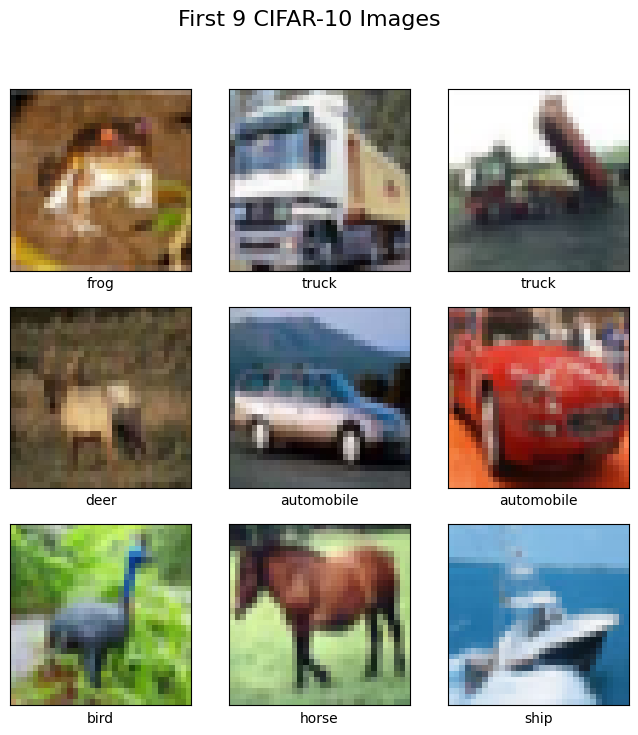

In [ ]:
# plot first few images

# CIFAR-10 label names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the first 9 images
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[int(y_train[i])])
plt.suptitle('First 9 CIFAR-10 Images', fontsize=16)
plt.show()


### Feature Rescaling

In [ ]:
# Rescale Input
X_train = X_train / 255.
X_test  = X_test / 255.

### OneHotEncode Target Variable

In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test  = to_categorical(y_test, num_classes=10)

## `+` Set Global Parameters

In [ ]:
# Hyperparameters
BATCH_SIZE  = 64
NUM_CLASSES = 10
EPOCHS      = 50

## `i` Trial no. 1

### Model Training

In [ ]:
# Build ANN model

# model = Sequential([
#     Flatten(input_shape=(32, 32, 3)),
#     Dense(512, activation='relu'),
#     Dropout(0.3),
#     Dense(256, activation='relu'),
#     Dropout(0.3),
#     Dense(128, activation='relu'),
#     Dropout(0.3),
#     Dense(64, activation='relu'),
#     Dropout(0.3),

#     Dense(NUM_CLASSES, activation='softmax')
# ])


model = Sequential()
model.add(Input(shape=X_train.shape[1:]))
model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(256, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(NUM_CLASSES, activation='softmax'))


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,746,506 (6.66 MB)

 Trainable params: 1,746,506 (6.66 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train
history = model.fit(X_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(X_test, y_test))

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.2663 - loss: 2.0093 - val_accuracy: 0.3737 - val_loss: 1.7169
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3820 - loss: 1.6977 - val_accuracy: 0.4167 - val_loss: 1.6228
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4184 - loss: 1.6157 - val_accuracy: 0.4462 - val_loss: 1.5392
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4462 - loss: 1.5411 - val_accuracy: 0.4633 - val_loss: 1.5141
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4614 - loss: 1.4993 - val_accuracy: 0.4421 - val_loss: 1.5708
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4766 - loss: 1.4621 - val_accuracy: 0.4828 - val_loss: 1.4688
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4919 - loss: 1.4198 - val_accuracy: 0.4812 - val_loss: 1.4479
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4994 - loss: 1.4012 - val_accuracy: 0.

### Model Evaluation

In [ ]:
# Evaluate on training data
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Accuracy for training: {train_accuracy * 100:.2f}")

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy for testing: {test_accuracy * 100:.2f}")


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7228 - loss: 0.7636
Accuracy for training: 71.81
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4808 - loss: 1.9112
Accuracy for testing: 48.85


In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

### Result Visualization

In [159]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

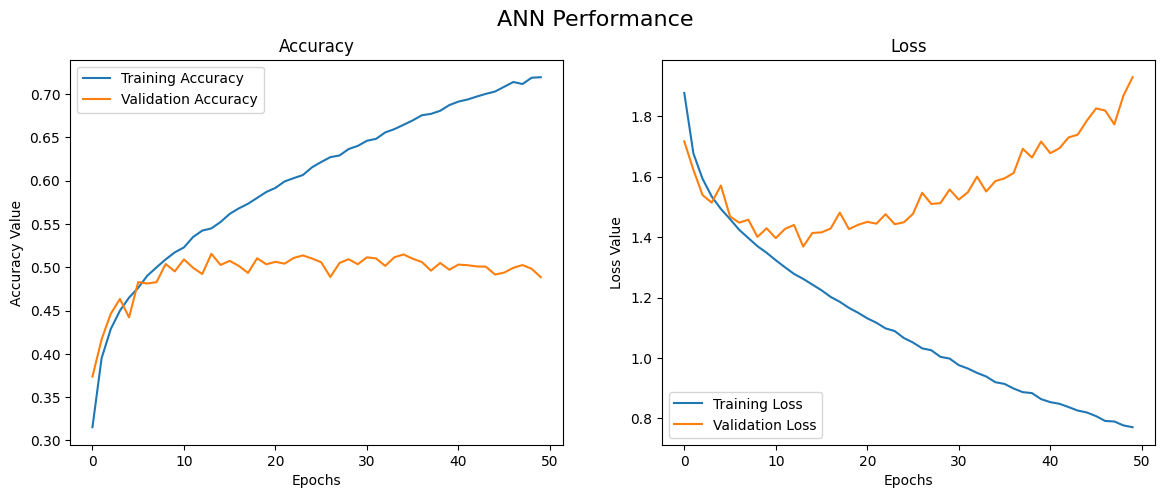

In [160]:
# Plot the training and validation accuracy and loss

fig = plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Value')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

fig.suptitle('ANN Performance', fontsize=16)

plt.show()

## `ii` Trial no. 2

### Model Training

In [ ]:
model = Sequential()
model.add(Input(shape=X_train.shape[1:]))
model.add(Flatten())

model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(NUM_CLASSES, activation='softmax'))

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1024)                │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,169,226 (19.72 MB)

 Trainable params: 5,163,082 (19.70 MB)

 Non-trainable params: 6,144 (24.00 KB)

In [ ]:
# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train
history2 = model.fit(X_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(X_test, y_test))

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3326 - loss: 1.8617 - val_accuracy: 0.3942 - val_loss: 1.6982
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4517 - loss: 1.5476 - val_accuracy: 0.3192 - val_loss: 1.9648
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5010 - loss: 1.4163 - val_accuracy: 0.4135 - val_loss: 1.6397
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5385 - loss: 1.3262 - val_accuracy: 0.4575 - val_loss: 1.5362
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5603 - loss: 1.2479 - val_accuracy: 0.4196 - val_loss: 1.7298
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5816 - loss: 1.1875 - val_accuracy: 0.4476 - val_loss: 1.5869
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6100 - loss: 1.1201 - val_accuracy: 0.4848 - val_loss: 1.4559
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6327 - loss: 1.0530 - val_accuracy: 0

### Model Evaluation

In [ ]:
# Evaluate on training data
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Accuracy for training: {train_accuracy * 100:.2f}")

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy for testing: {test_accuracy * 100:.2f}")


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8928 - loss: 0.4906
Accuracy for training: 89.46
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5163 - loss: 3.1269
Accuracy for testing: 52.44


In [ ]:
history2.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

### Result Visualization

In [162]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

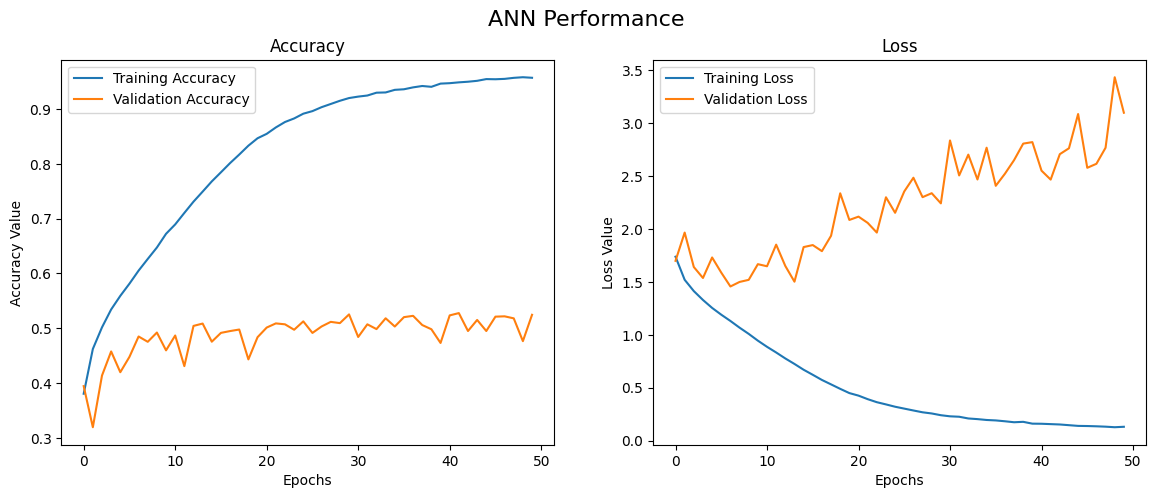

In [163]:
# Plot the training and validation accuracy and loss

fig = plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Value')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

fig.suptitle('ANN Performance', fontsize=16)

plt.show()

**Note:** Add more trials and explore different hyperparameters and design decisions.

------------------------------

# 02: Transfer Learning
- Design your `deep convolutional neural network` to classify the `CIFAR 10` images into one of the 10 classes
- Use a pre-trained model to boost your network.
- Invistage the use of different architectures (different `layers`, `kernel sizes`, `pooling`, `learning rate`, `optimizers`, `loss function`)

You have to specify filters and kernel_size. These parameters have no default.

Default padding is valid, which means no zero-padding, and the default strides is (1,1).

$\frac{N - F + 2P}{S} + 1$

$P = \frac{F - 1}{2}$

## `i` Trial no. 1

### Model Training

In [ ]:
# Load VGG16 without top layers
base_model = VGG19(weights='imagenet', include_top=False)

# base_model.trainable = False

for layer in base_model.layers:
  layer.trainable = False

base_model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)          │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
model = Sequential()
model.add(Input(shape=X_train.shape[1:]))
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 1, 1, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,197,514 (77.05 MB)

 Trainable params: 173,130 (676.29 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train
history3 = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.15)

Epoch 1/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.3633 - loss: 1.7699 - val_accuracy: 0.5229 - val_loss: 1.3518
Epoch 2/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.5151 - loss: 1.3661 - val_accuracy: 0.5517 - val_loss: 1.2755
Epoch 3/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.5526 - loss: 1.2740 - val_accuracy: 0.5544 - val_loss: 1.2524
Epoch 4/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.5676 - loss: 1.2337 - val_accuracy: 0.5749 - val_loss: 1.1988
Epoch 5/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.5793 - loss: 1.1934 - val_accuracy: 0.5896 - val_loss: 1.1724
Epoch 6/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.5944 - loss: 1.1588 - val_accuracy: 0.5860 - val_loss: 1.1766
Epoch 7/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6011 - loss: 1.1388 - val_accuracy: 0.5957 - val_loss: 1.1604
Epoch 8/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.6065 - loss: 1.1063 - 

In [ ]:
history3.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

### Model Evaluation

In [ ]:
# Evaluate on training data
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Accuracy for training: {train_accuracy * 100:.2f}")

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy for testing: {test_accuracy * 100:.2f}")


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8257 - loss: 0.5089
Accuracy for training: 79.50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5962 - loss: 1.3063
Accuracy for testing: 60.43


### Result Visualization

In [164]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

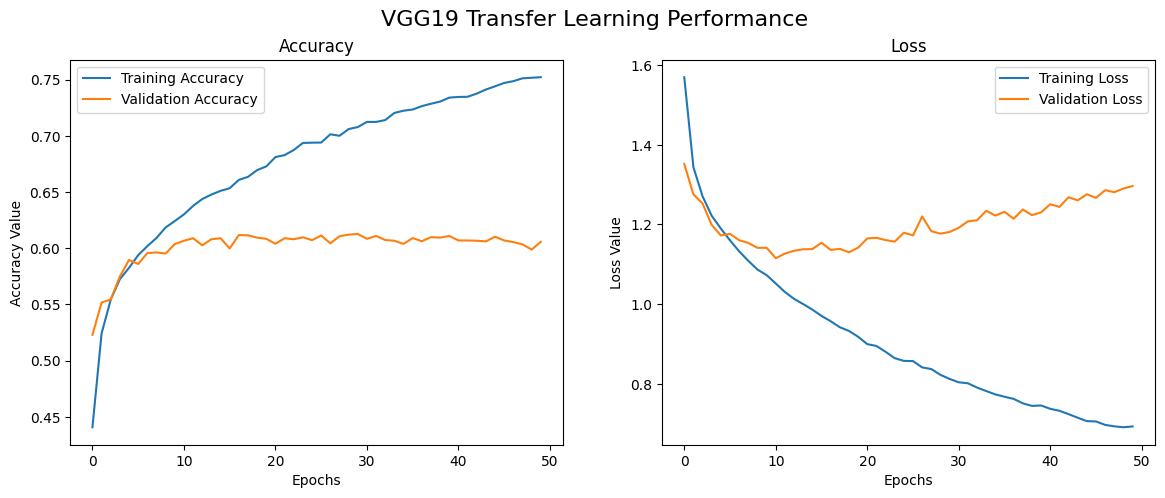

In [165]:
# Plot the training and validation accuracy and loss

fig = plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Value')
plt.legend()


# Loss plot
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

fig.suptitle('VGG19 Transfer Learning Performance', fontsize=16)

plt.show()

## `ii` Trial no. 2

### Model Training

In [ ]:
pre_trained = ResNet50V2(include_top=False, pooling='avg', weights='imagenet')
for layer in pre_trained.layers:
  layer.trainable = False
pre_trained.summary()

Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, None, None, 3)  │              0 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, None, None, 64) │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, None, None, 64) │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, None, None, 64) │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, None, None, 64) │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, None, None, 64) │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, None, None, 64) │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, None, None, 64) │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, None, None, 64) │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, None, None, 64) │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, None, None, 64) │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, None, None, 64) │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, None, None, 64) │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv  

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,564,800 (89.89 MB)

In [ ]:
model = Sequential()
model.add(Input(shape=X_train.shape[1:]))
model.add(pre_trained)
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)              │ (None, 2048)                │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,585,290 (89.97 MB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history4 = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.15)

Epoch 1/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 26s 24ms/step - accuracy: 0.2510 - loss: 2.1178 - val_accuracy: 0.3492 - val_loss: 1.9105
Epoch 2/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.3693 - loss: 1.8687 - val_accuracy: 0.3720 - val_loss: 1.8521
Epoch 3/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.3904 - loss: 1.7923 - val_accuracy: 0.3783 - val_loss: 1.8250
Epoch 4/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.3984 - loss: 1.7591 - val_accuracy: 0.3808 - val_loss: 1.8125
Epoch 5/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4066 - loss: 1.7302 - val_accuracy: 0.3844 - val_loss: 1.8000
Epoch 6/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4117 - loss: 1.7114 - val_accuracy: 0.3863 - val_loss: 1.7952
Epoch 7/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.4214 - loss: 1.6834 - val_accuracy: 0.3897 - val_loss: 1.7932
Epoch 8/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4214 - loss: 1.6792 - val_ac

In [ ]:
history4.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

### Model Evaluation

In [ ]:
# Evaluate on training data
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Accuracy for training: {train_accuracy * 100:.2f}")

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy for testing: {test_accuracy * 100:.2f}")


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.4614 - loss: 1.5445
Accuracy for training: 45.12
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4010 - loss: 1.8772
Accuracy for testing: 39.06


### Result Visualization

In [166]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

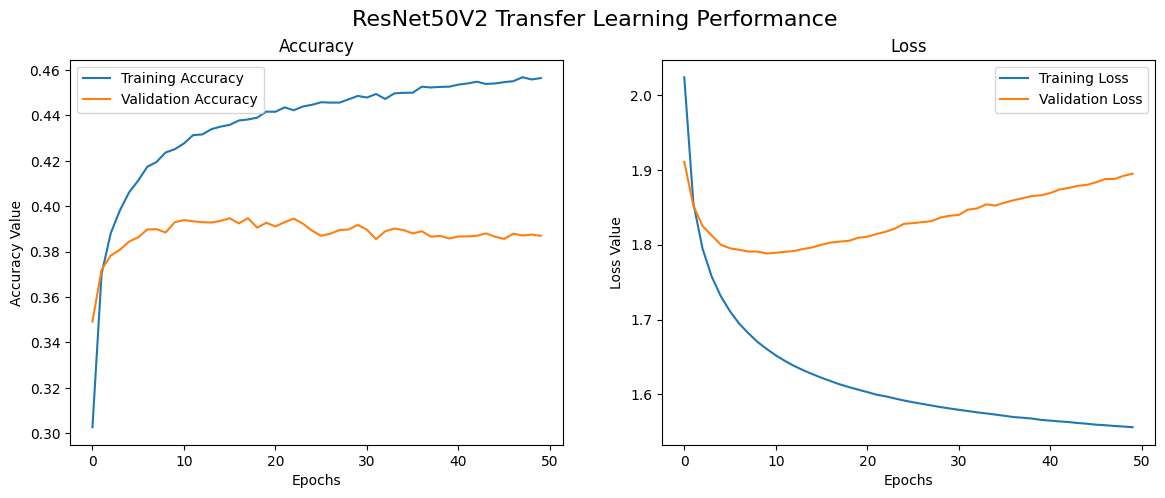

In [167]:
# Plot the training and validation accuracy and loss

fig = plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Value')
plt.legend()


# Loss plot
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

fig.suptitle('ResNet50V2 Transfer Learning Performance', fontsize=16)

plt.show()

---

# `03` MNIST Dataset
- Repeat Assignment 1 and 2 using MNIST dataset but do NOT use transfer learning this time (design the network from scratch)
- Note that you will need to convert the training labels into categorical using one hot encoding using `to_categorical()` function

## `+` Load MNIST Dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


### OneHotEncode Target Variable

In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test  = to_categorical(y_test, num_classes=10)

### Preview the Images

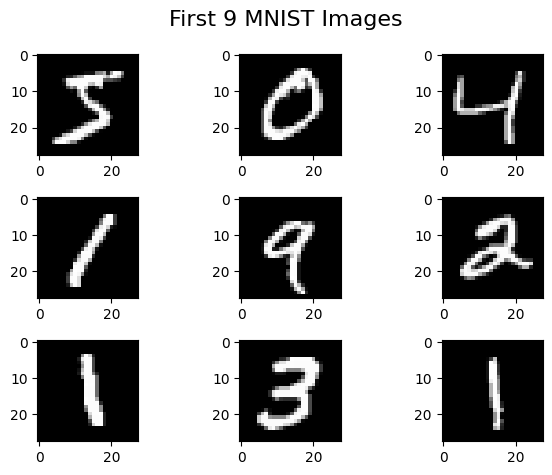

In [ ]:
# plot first few images

# Plot the first 9 images
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray')

plt.suptitle('First 9 MNIST Images', fontsize=16)
plt.tight_layout()
plt.show()

### Rescale Independent Features

In [ ]:
# Rescale Input
X_train = X_train / 255.
X_test  = X_test / 255.

## `+` Set Global Parameters

In [ ]:
# Hyperparameters
BATCH_SIZE  = 64
NUM_CLASSES = 10
EPOCHS      = 50

## `i` ANN Trials

### Trial no. 1

#### Model Training

In [ ]:
model = Sequential()
model.add(Input(shape=X_train.shape[1:]))
model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(NUM_CLASSES, activation='softmax'))


model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history5 = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.15)

Epoch 1/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8559 - loss: 0.4891 - val_accuracy: 0.9683 - val_loss: 0.1149
Epoch 2/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9678 - loss: 0.1063 - val_accuracy: 0.9720 - val_loss: 0.0955
Epoch 3/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9799 - loss: 0.0664 - val_accuracy: 0.9721 - val_loss: 0.0884
Epoch 4/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9845 - loss: 0.0483 - val_accuracy: 0.9770 - val_loss: 0.0862
Epoch 5/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9883 - loss: 0.0356 - val_accuracy: 0.9737 - val_loss: 0.0967
Epoch 6/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9909 - loss: 0.0275 - val_accuracy: 0.9762 - val_loss: 0.0899
Epoch 7/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9918 - loss: 0.0247 - val_accuracy: 0.9784 - val_loss: 0.0885
Epoch 8/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9949 - loss: 0.0156 - val_accuracy: 0.

In [ ]:
history5.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

#### Model Ealuation

In [ ]:
# Evaluate on training data
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Accuracy for training: {train_accuracy * 100:.2f}")

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy for testing: {test_accuracy * 100:.2f}")


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9991 - loss: 0.0032
Accuracy for training: 99.70
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9785 - loss: 0.1437
Accuracy for testing: 98.13


#### Result Visualization

In [172]:
acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']
loss = history5.history['loss']
val_loss = history5.history['val_loss']

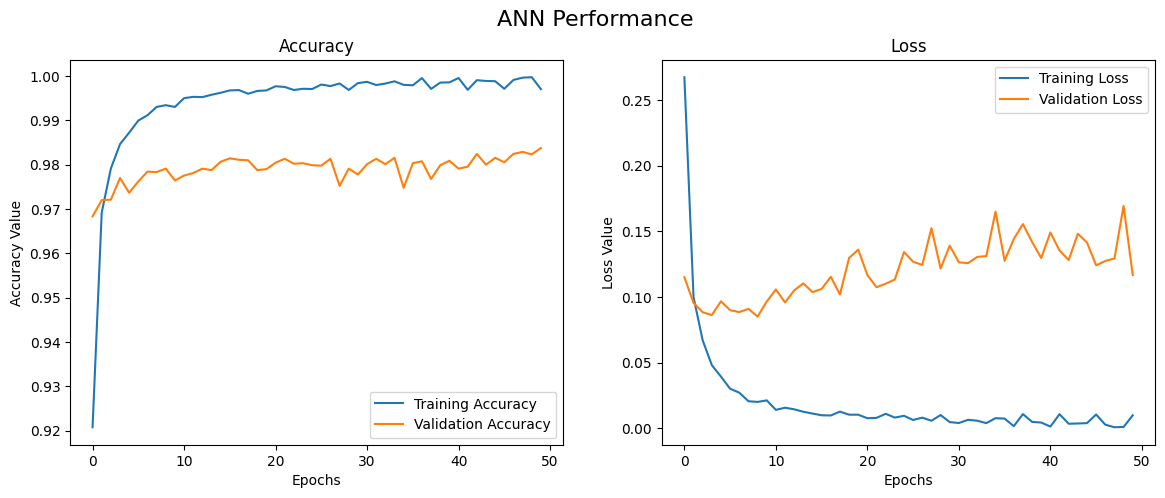

In [173]:
# Plot the training and validation accuracy and loss

fig = plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Value')
plt.legend()


# Loss plot
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

fig.suptitle('ANN Performance', fontsize=16)

plt.show()

### Trial no. 2

#### Model Training

In [ ]:
model = Sequential()
model.add(Input(shape=X_train.shape[1:]))
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(NUM_CLASSES, activation='softmax'))


model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1024)                │         803,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,501,770 (5.73 MB)

 Trainable params: 1,501,770 (5.73 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history6 = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.15)

Epoch 1/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8405 - loss: 0.4996 - val_accuracy: 0.9650 - val_loss: 0.1197
Epoch 2/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9614 - loss: 0.1291 - val_accuracy: 0.9693 - val_loss: 0.1095
Epoch 3/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9719 - loss: 0.0967 - val_accuracy: 0.9701 - val_loss: 0.1134
Epoch 4/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9779 - loss: 0.0762 - val_accuracy: 0.9726 - val_loss: 0.0961
Epoch 5/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9808 - loss: 0.0618 - val_accuracy: 0.9763 - val_loss: 0.0843
Epoch 6/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9828 - loss: 0.0560 - val_accuracy: 0.9784 - val_loss: 0.0890
Epoch 7/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9856 - loss: 0.0480 - val_accuracy: 0.9763 - val_loss: 0.0870
Epoch 8/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9869 - loss: 0.0442 - val_accuracy: 0

In [ ]:
history6.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

#### Model Evaluation

In [ ]:
# Evaluate on training data
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Accuracy for training: {train_accuracy * 100:.2f}")

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy for testing: {test_accuracy * 100:.2f}")


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9983 - loss: 0.0063
Accuracy for training: 99.63
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9812 - loss: 0.1480
Accuracy for testing: 98.36


#### Result Visualization

In [174]:
acc = history6.history['accuracy']
val_acc = history6.history['val_accuracy']
loss = history6.history['loss']
val_loss = history6.history['val_loss']

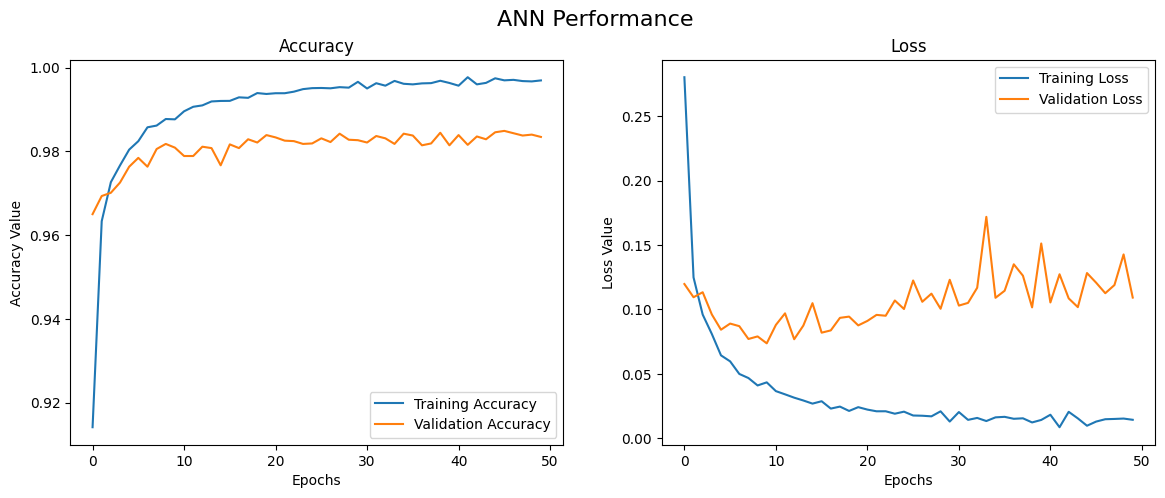

In [175]:
# Plot the training and validation accuracy and loss

fig = plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Value')
plt.legend()


# Loss plot
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

fig.suptitle('ANN Performance', fontsize=16)

plt.show()

## `ii` CNN Trials

### Trial no. 1

#### Datasets Reshaping

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

#### Model Training

In [ ]:
model = Sequential()
model.add(Input(shape=X_train.shape[1:]))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history7 = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.15)

Epoch 1/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8620 - loss: 0.4460 - val_accuracy: 0.9836 - val_loss: 0.0578
Epoch 2/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9779 - loss: 0.0708 - val_accuracy: 0.9857 - val_loss: 0.0475
Epoch 3/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9869 - loss: 0.0421 - val_accuracy: 0.9884 - val_loss: 0.0386
Epoch 4/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9896 - loss: 0.0359 - val_accuracy: 0.9910 - val_loss: 0.0334
Epoch 5/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9916 - loss: 0.0255 - val_accuracy: 0.9900 - val_loss: 0.0357
Epoch 6/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9936 - loss: 0.0194 - val_accuracy: 0.9898 - val_loss: 0.0340
Epoch 7/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9948 - loss: 0.0178 - val_accuracy: 0.9903 - val_loss: 0.0355
Epoch 8/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9958 - loss: 0.0135 - val_accuracy: 0.

In [ ]:
history7.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

#### Model Evaluation

In [ ]:
# Evaluate on training data
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Accuracy for training: {train_accuracy * 100:.2f}")

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy for testing: {test_accuracy * 100:.2f}")


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9997 - loss: 0.0012
Accuracy for training: 99.85
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9900 - loss: 0.0664
Accuracy for testing: 99.22


#### Result Visualization

In [176]:
acc = history7.history['accuracy']
val_acc = history7.history['val_accuracy']
loss = history7.history['loss']
val_loss = history7.history['val_loss']

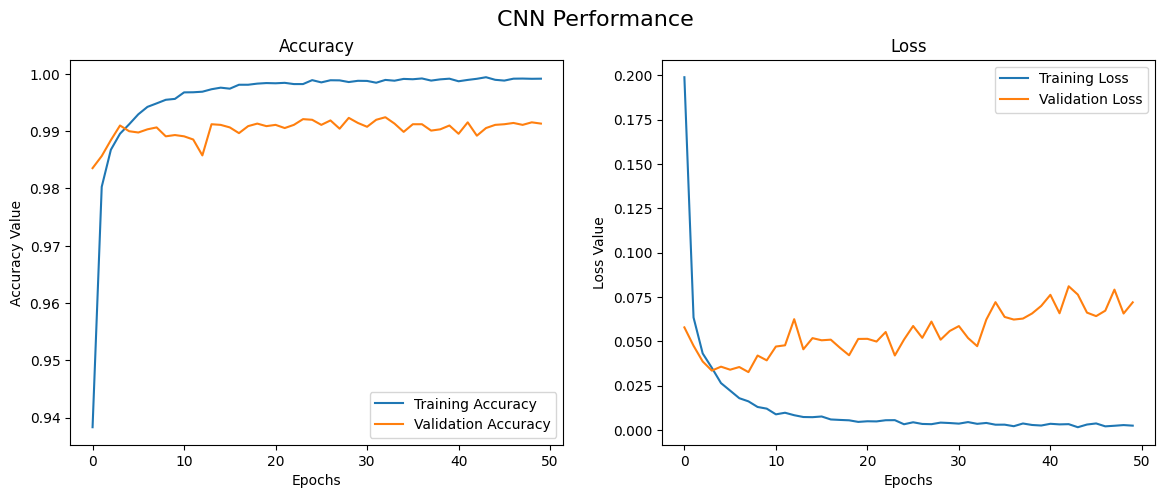

In [177]:
# Plot the training and validation accuracy and loss

fig = plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Value')
plt.legend()


# Loss plot
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

fig.suptitle('CNN Performance', fontsize=16)

plt.show()

### Trial no. 2

#### Model Training

In [ ]:
model = Sequential()
model.add(Input(shape=X_train.shape[1:]))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 256)                 │         409,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 472,234 (1.80 MB)

 Trainable params: 472,234 (1.80 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history8 = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.15)

Epoch 1/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7896 - loss: 0.6236 - val_accuracy: 0.9817 - val_loss: 0.0697
Epoch 2/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9768 - loss: 0.0835 - val_accuracy: 0.9892 - val_loss: 0.0413
Epoch 3/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9851 - loss: 0.0549 - val_accuracy: 0.9901 - val_loss: 0.0366
Epoch 4/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9908 - loss: 0.0348 - val_accuracy: 0.9896 - val_loss: 0.0432
Epoch 5/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9915 - loss: 0.0305 - val_accuracy: 0.9888 - val_loss: 0.0478
Epoch 6/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9924 - loss: 0.0292 - val_accuracy: 0.9910 - val_loss: 0.0362
Epoch 7/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9939 - loss: 0.0241 - val_accuracy: 0.9911 - val_loss: 0.0406
Epoch 8/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9942 - loss: 0.0202 - val_accuracy: 0

In [ ]:
history8.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

#### Model Evaluation

In [ ]:
# Evaluate on training data
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Accuracy for training: {train_accuracy * 100:.2f}")

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy for testing: {test_accuracy * 100:.2f}")


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9997 - loss: 0.0017
Accuracy for training: 99.85
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9881 - loss: 0.1029
Accuracy for testing: 99.07


#### Result Visualization

In [178]:
acc = history8.history['accuracy']
val_acc = history8.history['val_accuracy']
loss = history8.history['loss']
val_loss = history8.history['val_loss']

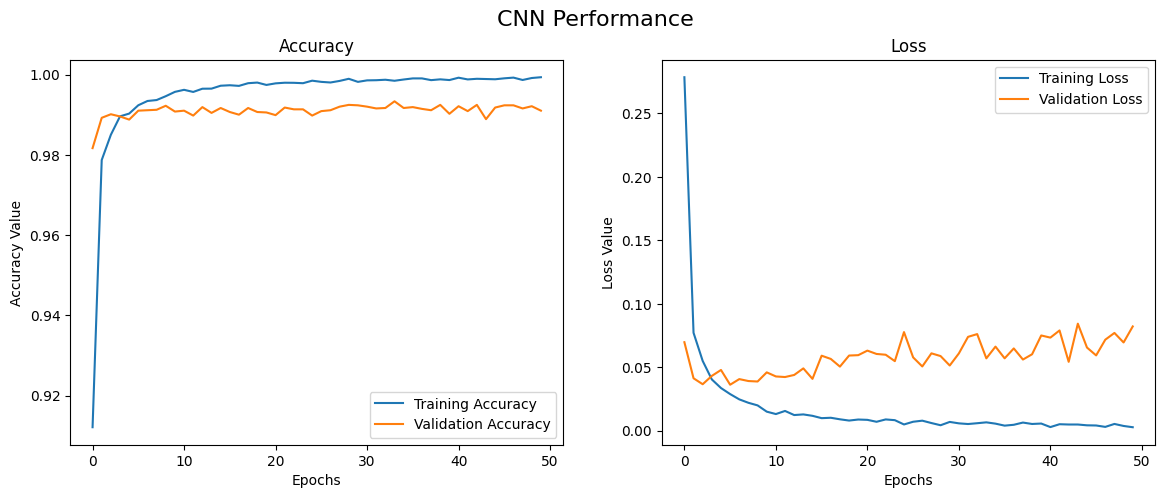

In [179]:
# Plot the training and validation accuracy and loss

fig = plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Value')
plt.legend()


# Loss plot
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

fig.suptitle('CNN Performance', fontsize=16)

plt.show()

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
